<a href="https://colab.research.google.com/github/ggpal7117/Stock-Return-Analysis-with-Monte-Carlo-Simulation/blob/main/Stock_Portfolio_Analysis_w_Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will simulate stock returns using a monte carlo simulation for two different stock portfolio.

Scenario: I am a college student who works a part time job and want to invest in a eft(usually a "portfolio" of stocks). Using a monte carlo simulation, we can simulate returns over time for these portfolios to see which will statistically give me the most money by the time I graduate

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import lxml
from datetime import date
from dateutil.relativedelta import relativedelta
import requests
from scipy.stats import shapiro
from datetime import datetime
import matplotlib.dates as mdates

In [47]:
# How much money you will invest into a portfolio each year
ANNUAL_INVESTMENT_AMT = 1000

In [48]:
# Will create 4 "portfolios" from Commodity, Country, Sector, Index ETFS
# Commodoties Choice: GDXJ --> VanEck Junior Gold Miners ETF
# Index: QQQ --> Invesco QQQ Trust
# Sector: SMH -->	VanEck Semiconductor ETF
# Country: GREK: Greece
invesments = ["GDXJ", "QQQ", "SMH", "GREK"]
investment_names = ["VanEck Junior Gold Miners ETF", "Invesco QQQ Trust", "VanEck Semiconductor ETF", "Greece"]

In [49]:
today = date.today() - relativedelta(days=2)
sim_start_date = today - relativedelta(years=10)
sim_start_date

datetime.date(2015, 10, 10)

/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed


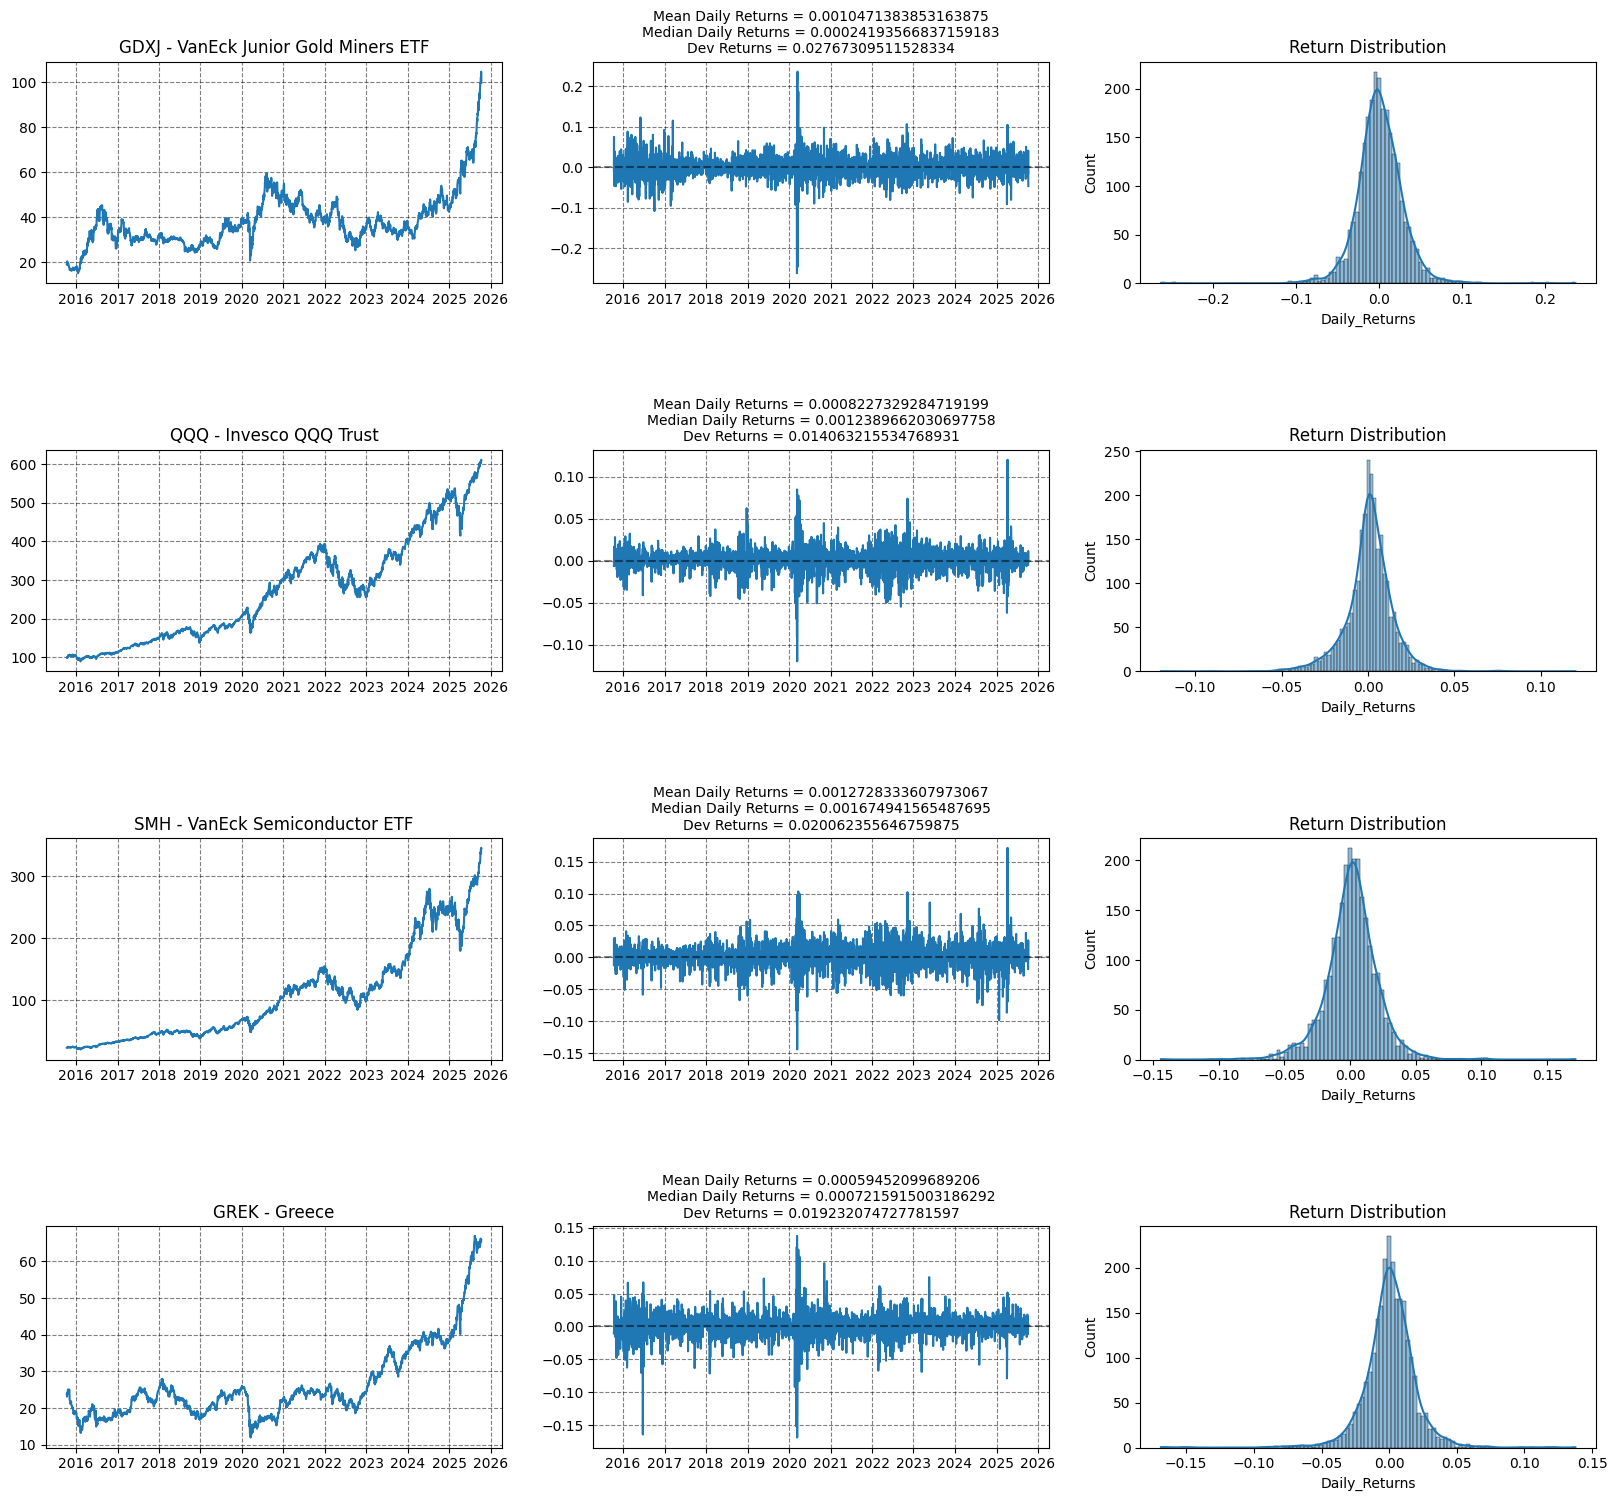

In [50]:
# Get all stock data
fig, ax = plt.subplots(4, 3, figsize=(20, 18))
stock_data = pd.DataFrame() # Must loop through to identify which stock is which
for i, stock in enumerate(invesments):
    data = yf.download(stock, start=sim_start_date, end=today)
    data.columns = data.columns.values
    data.columns = ["Close", "High", "Low", "Open", "Volume"]
    data["Stock"] = stock
    data["(t+1)"] = data["Close"].shift(-1)
    data["Daily_Returns"] = (data["(t+1)"] - data["Close"])/data["Close"]
    ax[i,0].plot(data["Close"])
    ax[i,0].set_title(f"{stock} - {investment_names[i]}")
    ax[i,0].grid(alpha = 0.5, color = 'k', linestyle='--')

    ax[i,1].plot(data["Daily_Returns"])
    ax[i,1].set_title(f"Mean Daily Returns = {data["Daily_Returns"].mean()}\nMedian Daily Returns = {data["Daily_Returns"].median()}\nDev Returns = {data["Daily_Returns"].std()}", fontsize = 10)
    ax[i,1].grid(alpha = 0.5, color = 'k', linestyle='--')
    ax[i,1].axhline(y=0, color='k', linestyle='--', alpha = 0.5)

    sns.histplot(data["Daily_Returns"], ax=ax[i,2], kde=True)
    #shap, p = shapiro(data["Daily_Returns"])
    ax[i, 2].set_title(f"Return Distribution")

    stock_data = pd.concat([stock_data, data])

stock_data
plt.subplots_adjust(hspace=0.75)
plt.show()

In [51]:
# Add colummn shifted a year, and yearly returns
stock_data["(t+year)"] = stock_data["Close"].shift(-252)
stock_data["Yearly_Returns"] = (stock_data["(t+year)"] - stock_data["Close"])/stock_data["Close"]
stock_data["Log_Returns"] = np.log(stock_data["(t+year)"]/stock_data["Close"])
stock_data.head()

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2015-10-12,18.917860,19.604044,18.648596,19.604044,14385500,GDXJ,18.761515,-0.008264,32.642132,0.725466,0.545497
2015-10-13,18.761515,19.213181,18.613855,18.770201,6453300,GDXJ,20.168623,0.075000,33.508270,0.786011,0.579985
2015-10-14,20.168623,20.272854,19.143690,19.195805,21102000,GDXJ,20.272856,0.005168,34.251926,0.698278,0.529615
2015-10-15,20.272856,20.481317,19.638787,19.777761,8536300,GDXJ,19.577986,-0.034276,33.315796,0.643370,0.496749
2015-10-16,19.577986,20.342343,19.534555,20.194683,12008200,GDXJ,18.665970,-0.046584,33.866974,0.729850,0.548035


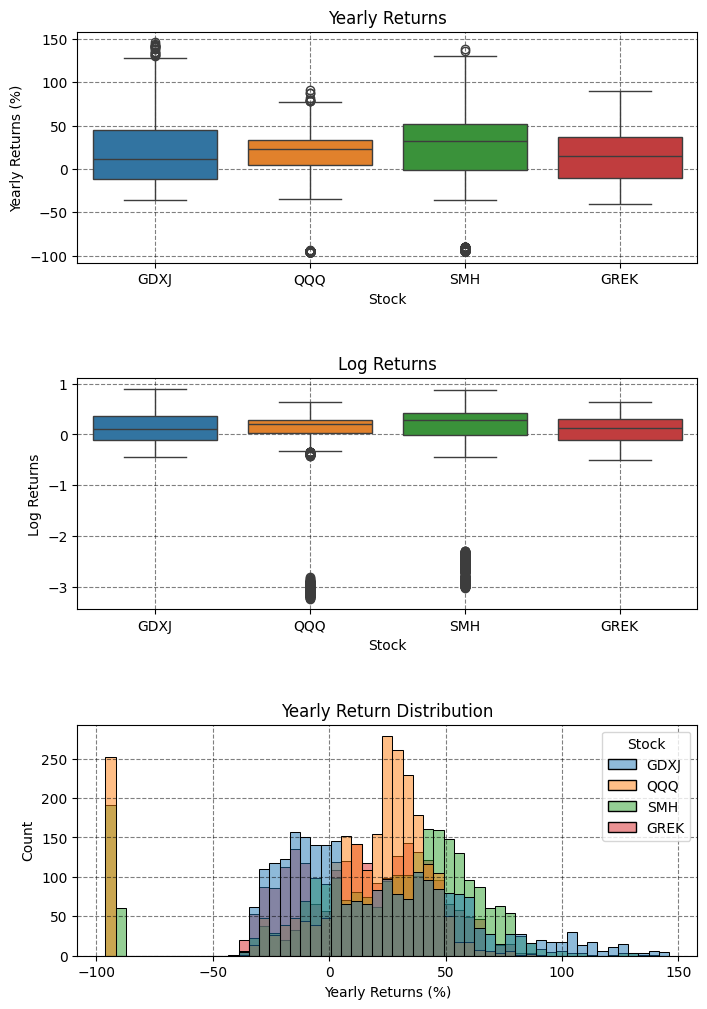

In [52]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
stock_data_reset = stock_data.reset_index()
sns.boxplot(x="Stock", y=stock_data_reset["Yearly_Returns"]*100, data=stock_data_reset, hue = "Stock", ax=ax[0])
ax[0].set_title("Yearly Returns")
ax[0].grid(alpha = 0.5, color = 'k', linestyle='--')
ax[0].set_ylabel("Yearly Returns (%)")

sns.boxplot(x="Stock", y="Log_Returns", data=stock_data_reset, hue = "Stock", ax=ax[1])
ax[1].set_title("Log Returns")
ax[1].grid(alpha = 0.5, color = 'k', linestyle='--')
ax[1].set_ylabel("Log Returns")


sns.histplot(data=stock_data_reset, x=stock_data_reset["Yearly_Returns"]*100, ax=ax[2], hue = "Stock")
ax[2].set_title("Yearly Return Distribution")
ax[2].grid(alpha = 0.5, color = 'k', linestyle='--')
ax[2].set_xlabel("Yearly Returns (%)")


plt.subplots_adjust(hspace=0.5)
plt.show()

In [57]:
# Lets see how much 1000 wouldve compunded if we invested in 2015 (SIMPLE INTEREST/NO REINVESTMENT)
def calc_return(stock, amt=1000):
  subset = stock_data.query('Stock == @stock')
  pct_change_total = ((subset.Close.iloc[-1] - subset.Close.iloc[0]) / subset.Close.iloc[0])*100
  print(f"{stock} 10 year return: {round(pct_change_total, 2)}")
  return pct_change_total * amt

def avg_yearly_return(stock):
  subset = stock_data.query('Stock == @stock')
  return round(subset["Yearly_Returns"].mean()*100, 2), round(subset["Yearly_Returns"].std()*100, 2)


print((f"$1000 invested in QQQ on {sim_start_date} compounds to {round(calc_return("QQQ"), 2)}"))
print(f"QQQ Average Yearly Return: {avg_yearly_return("QQQ")[0]}. QQQ Standard Deviation: {avg_yearly_return("QQQ")[1]}")
print()

print((f"$1000 invested in GREK on {sim_start_date} compounds to {round(calc_return("GREK"), 2)}"))
print(f"GREK Average Yearly Return: {avg_yearly_return("GREK")[0]}. GREK Standard Deviation: {avg_yearly_return("GREK")[1]}")
print()

print((f"$1000 invested in GDXJ on {sim_start_date} compounds to {round(calc_return("GDXJ"), 2)}"))
print(f"GDXJ Average Yearly Return: {avg_yearly_return("GDXJ")[0]}. GDXJ Standard Deviation: {avg_yearly_return("GDXJ")[1]}")
print()

print((f"$1000 invested in SMH on {sim_start_date} compounds to {round(calc_return("SMH"), 2)}"))
print(f"SMH Average Yearly Return: {avg_yearly_return("SMH")[0]}. SMH Standard Deviation: {avg_yearly_return("SMH")[1]}")

QQQ 10 year return: 515.93
$1000 invested in QQQ on 2015-10-10 compounds to 515934.65
QQQ Average Yearly Return: 9.96. QQQ Standard Deviation: 39.87

GREK 10 year return: 178.42
$1000 invested in GREK on 2015-10-10 compounds to 178424.65
GREK Average Yearly Return: 15.15. GREK Standard Deviation: 27.74

GDXJ 10 year return: 428.02
$1000 invested in GDXJ on 2015-10-10 compounds to 428019.55
GDXJ Average Yearly Return: 20.12. GDXJ Standard Deviation: 38.19

SMH 10 year return: 1374.83
$1000 invested in SMH on 2015-10-10 compounds to 1374826.63
SMH Average Yearly Return: 20.21. SMH Standard Deviation: 47.15


In [54]:
# Lets now do a "backtesting" simulation to see how well stocks perform over a random
# We will assume investments happen yearly
end_range_max = today - relativedelta(years=4)
date_ls = stock_data.index[stock_data.index < pd.to_datetime(end_range_max)]


def get_nearest_trading_day(target_date, valid_dates):
  valid_dates = valid_dates.sort_values()
  if target_date in valid_dates:
    return target_date

  # If date before earliest or after latest
  if target_date < valid_dates.min():
    return valid_dates.min()

  if target_date > valid_dates.max():
    return valid_dates.max()

  # Otherwise nearest before or equal
  return valid_dates[valid_dates <= target_date].max()


def plot(dates, subset):
  """Plot close with simulated dates"""
  plt.figure(figsize=(10, 6))
  plt.plot(subset.Close)

  for i, date in enumerate(dates):
    if i == 0:
      plt.axvline(x=date, color='g', linestyle='--', alpha=0.5)
    elif i == 4:
      plt.axvline(x=date, color='r', linestyle='--', alpha=0.5)
    else:
      plt.axvline(x=date, color='y', linestyle='--', alpha=0.5)

  plt.title(f"Price History for {subset.Stock.unique()[0]}")
  plt.xlabel("Date")
  plt.ylabel("Close Price")
  plt.grid(True)
  plt.show()


def compount_interest(rates, init_amount = 1000, verbose = False):
  """Perform Compound Interest Calculator that will track investments(all 4) over a certain period of time"""
  total = 0
  for i in range(4):
    if verbose:
      print(f"Investment Number {i} of 3")
    start = init_amount
    for j in range(i, 4):
      if verbose:
        print(f"---Investment {i} grows from {start}(at time period {j} to time period {j+1}) to --> {(start)*(1+rates[j])}")
      start = (start)*(1+rates[j])

    total += start
    if verbose:
      print(f"\nTotal Value: {total}")
    if verbose:
      print()

  total = np.round(total, 2)
  return total


def rand_range_single_sim(date_range, stock, should_plot=False, verbose=False):
  # Subset by stock
  subset = stock_data.query('Stock == @stock')

  start_date = pd.Timestamp(np.random.choice(date_range))
  start_trading_date = get_nearest_trading_day(start_date, subset.index)

  # --- Build list of yearly investment dates (5 years total range) ---
  dates = [start_trading_date]
  for i in range(1, 5):
      next_date = start_date + pd.DateOffset(years=i)
      next_trading_day = get_nearest_trading_day(next_date, subset.index)
      dates.append(next_trading_day)

  random_dates_df = subset[subset.index.isin(dates)]

  if verbose:
    display(random_dates_df)

  # Optinonal plot
  if should_plot:
    plot(dates, subset)


  # Perform actual single "simuation".
  # Track 1000 invested in dates[0] --> dates[4] and see how much it grows
  # Track 1000 invested in dates[1] --> dates[4] and see how much it grows
  # ....
  # Track 1000 invested in dates[3] --> dates[4] and see how much it grows
  # Sum everything
  total_value = 0

  if verbose:
    print(f"\n===== Simulating {stock} from {dates[0].date()} to {dates[-1].date()} =====")

  prices = random_dates_df["Close"].values
  pct_changes = np.diff(prices) / prices[:-1]
  if verbose:
    print(f"Prices: {prices}")
    print(f"Pct Changes: {pct_changes}")
    print()

  if verbose:
    tot = compount_interest(pct_changes, verbose=True)
  else:
    tot = compount_interest(pct_changes)

  if verbose:
    print(f"\nTotal Value: {tot}\n")

  return round(tot, 2)

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2020-03-11,188.617142,193.960101,186.211355,192.607459,89168800,QQQ,171.322586,-0.091691,309.032562,0.638412,0.493727
2021-03-11,309.032562,310.800994,305.932906,306.826834,53484800,QQQ,306.525574,-0.008112,323.438629,0.046617,0.045563
2022-03-11,316.731018,326.728960,316.242838,326.416517,66228400,QQQ,310.648285,-0.019205,292.479767,-0.076567,-0.079657
2023-03-10,283.804749,289.509385,282.654006,288.014362,98593600,QQQ,285.909637,0.007417,439.378937,0.548173,0.437076
2024-03-11,433.169403,434.427137,431.238208,433.288240,45860000,QQQ,439.378937,0.014335,466.577118,0.077124,0.074294


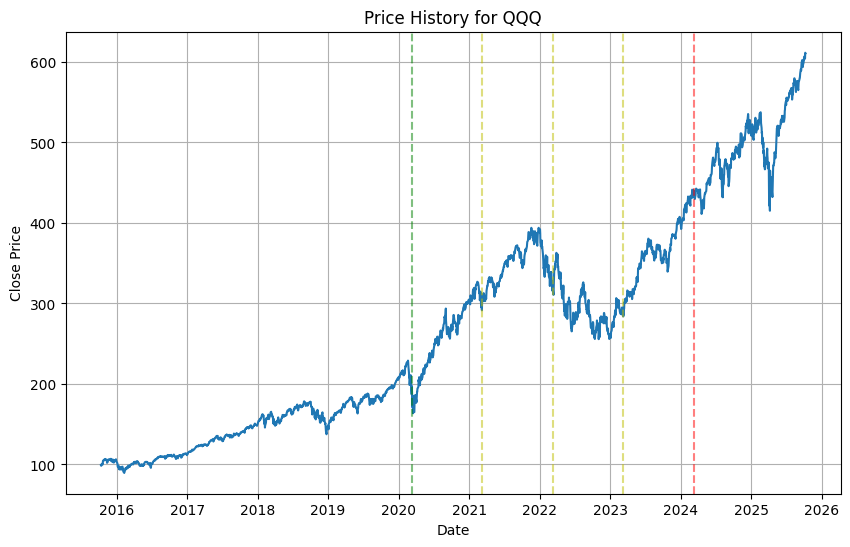


===== Simulating QQQ from 2020-03-11 to 2024-03-11 =====
Prices: [188.61714172 309.03256226 316.73101807 283.80474854 433.16940308]
Pct Changes: [ 0.63841186  0.02491147 -0.10395657  0.52629371]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 1638.411861360208
---Investment 0 grows from 1638.411861360208(at time period 1 to time period 2) to --> 1679.2271114493376
---Investment 0 grows from 1679.2271114493376(at time period 2 to time period 3) to --> 1504.660424506883
---Investment 0 grows from 1504.660424506883(at time period 3 to time period 4) to --> 2296.553744361496

Total Value: 2296.553744361496

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1024.9114713166473
---Investment 1 grows from 1024.9114713166473(at time period 2 to time period 3) to --> 918.3651925332836
---Investment 1 grows from 918.3651925332836(at time period 3 to time period 4) to --> 1401.6950185253781

Total

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2016-04-25,18.837193,19.070616,18.720482,19.070616,114867,GREK,18.720486,-0.006196,20.158752,0.070157,0.067805
2017-04-25,20.158752,20.182553,19.896951,19.944550,287833,GREK,20.301554,0.007084,25.284101,0.254249,0.226537
2018-04-25,25.284101,25.357037,25.016674,25.016674,128967,GREK,25.575840,0.011538,21.166847,-0.162840,-0.177740
2019-04-25,21.166847,21.191750,20.992533,20.992533,59700,GREK,21.166847,0.000000,15.082110,-0.287465,-0.338927
2020-04-24,15.082110,15.209493,14.878298,15.133063,152067,GREK,15.744500,0.043919,25.024193,0.659197,0.506334


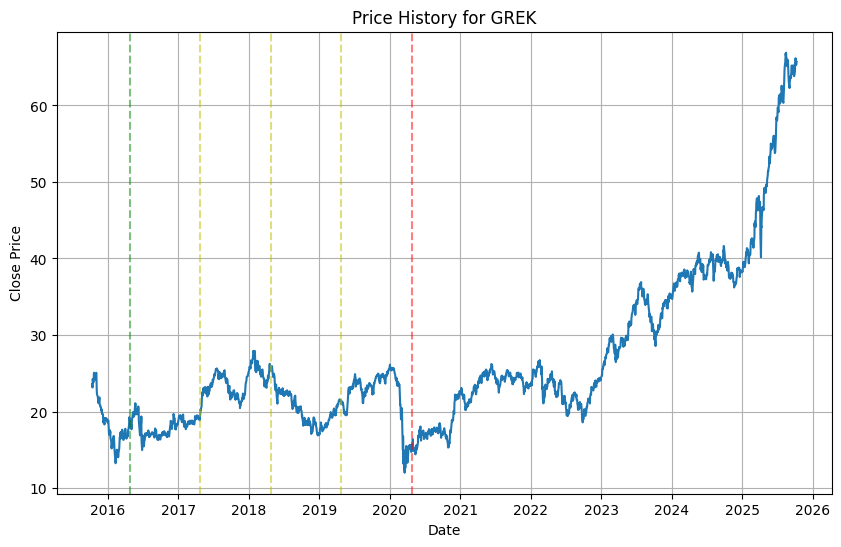


===== Simulating GREK from 2016-04-25 to 2020-04-24 =====
Prices: [18.83719254 20.15875244 25.28410149 21.16684723 15.0821104 ]
Pct Changes: [ 0.07015695  0.25424932 -0.16283965 -0.28746543]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 1070.156946345496
---Investment 0 grows from 1070.156946345496(at time period 1 to time period 2) to --> 1342.243619302086
---Investment 0 grows from 1342.243619302086(at time period 2 to time period 3) to --> 1123.6731370253524
---Investment 0 grows from 1123.6731370253524(at time period 3 to time period 4) to --> 800.6559563812244

Total Value: 800.6559563812244

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1254.2493172480401
---Investment 1 grows from 1254.2493172480401(at time period 2 to time period 3) to --> 1050.0077963915573
---Investment 1 grows from 1050.0077963915573(at time period 3 to time period 4) to --> 748.1668545117641

Total Va

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2017-06-22,30.967958,31.087740,30.590188,30.682326,13008900,GDXJ,31.511581,0.017554,30.213760,-0.024354,-0.024656
2018-06-22,30.213760,30.250630,29.928032,29.937247,6630500,GDXJ,29.974121,-0.007931,32.315262,0.069554,0.067242
2019-06-21,31.833635,31.842899,31.064888,31.703967,12443100,GDXJ,32.972866,0.035787,43.709446,0.373059,0.317041
2020-06-22,43.709446,44.146631,42.723447,42.862977,12758600,GDXJ,44.639629,0.021281,45.257656,0.035420,0.034808
2021-06-22,45.257656,45.578968,45.059200,45.295458,6784300,GDXJ,44.955246,-0.006682,34.649456,-0.234396,-0.267090


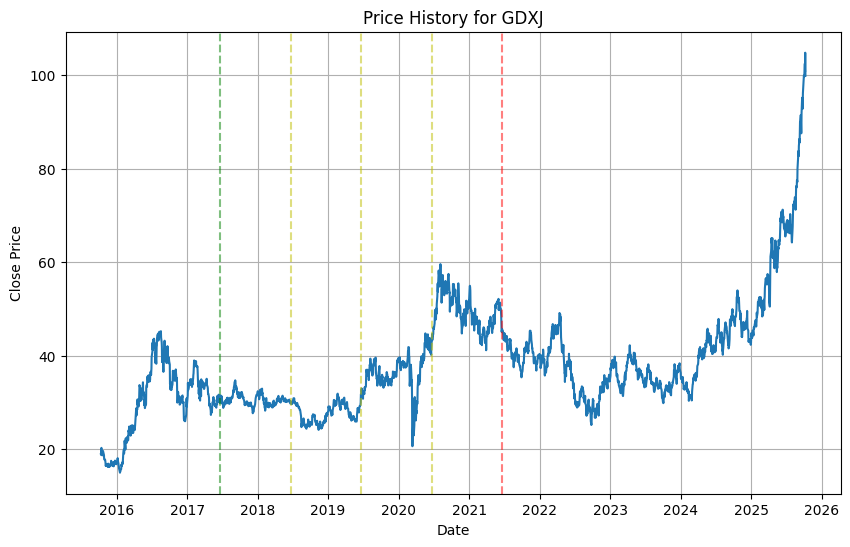


===== Simulating GDXJ from 2017-06-22 to 2021-06-22 =====
Prices: [30.96795845 30.21376038 31.83363533 43.70944595 45.2576561 ]
Pct Changes: [-0.02435414  0.05361381  0.37305857  0.03542049]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 975.6458574577721
---Investment 0 grows from 975.6458574577721(at time period 1 to time period 2) to --> 1027.9539538026581
---Investment 0 grows from 1027.9539538026581(at time period 2 to time period 3) to --> 1411.440990644999
---Investment 0 grows from 1411.440990644999(at time period 3 to time period 4) to --> 1461.4349270075395

Total Value: 1461.4349270075395

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1053.6138148335756
---Investment 1 grows from 1053.6138148335756(at time period 2 to time period 3) to --> 1446.6734828585986
---Investment 1 grows from 1446.6734828585986(at time period 3 to time period 4) to --> 1497.915371480777

Total 

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2016-09-07,30.297573,30.676808,30.265590,30.626547,7942000,SMH,30.238178,-0.001960,40.771309,0.345696,0.296911
2017-09-07,40.771309,40.858822,40.550228,40.775916,2636200,SMH,40.329140,-0.010845,49.439487,0.212605,0.192771
2018-09-07,49.439487,50.121540,49.299338,49.472188,14307000,SMH,49.920670,0.009733,57.254642,0.158075,0.146759
2019-09-06,56.921352,57.130847,56.607105,56.964202,5642800,SMH,57.140373,0.003848,82.838425,0.455314,0.375221
2020-09-04,82.838425,84.438069,79.982259,83.312034,9850800,SMH,79.165512,-0.044338,132.721985,0.602179,0.471365


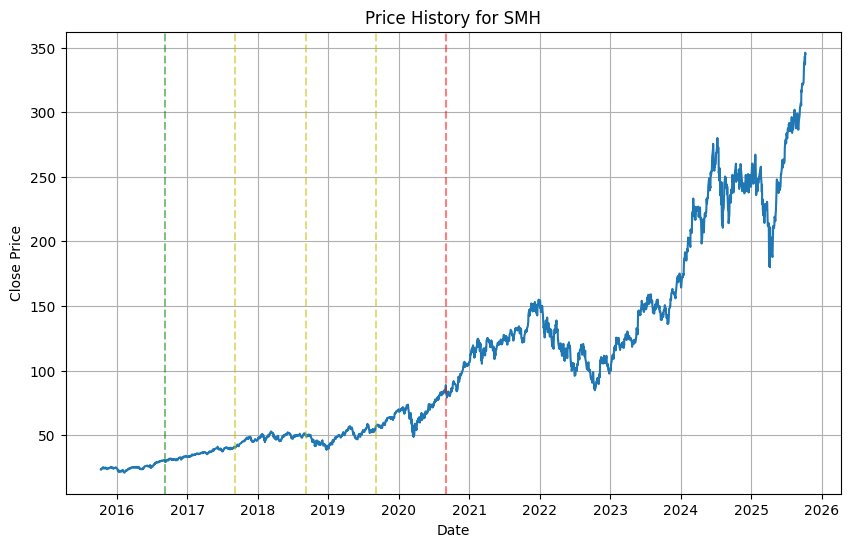


===== Simulating SMH from 2016-09-07 to 2020-09-04 =====
Prices: [30.29757309 40.7713089  49.43948746 56.92135239 82.83842468]
Pct Changes: [0.34569554 0.21260486 0.15133379 0.45531371]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 1345.6955373406308
---Investment 0 grows from 1345.6955373406308(at time period 1 to time period 2) to --> 1631.7969532103123
---Investment 0 grows from 1631.7969532103123(at time period 2 to time period 3) to --> 1878.7429678984508
---Investment 0 grows from 1878.7429678984508(at time period 3 to time period 4) to --> 2734.160404123376

Total Value: 2734.160404123376

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1212.60486338171
---Investment 1 grows from 1212.60486338171(at time period 2 to time period 3) to --> 1396.1129510849316
---Investment 1 grows from 1396.1129510849316(at time period 3 to time period 4) to --> 2031.7823224164324

Total Value:

In [55]:
# Perform "Backtest" simulation
qqq_rand_sim = rand_range_single_sim(date_ls, "QQQ", should_plot=True, verbose=True)
print()
print("=====================================================================================================================================================================")

grek_rand_sim = rand_range_single_sim(date_ls, "GREK", should_plot=True, verbose=True)
print()
print("=====================================================================================================================================================================")

gdjx_rand_sim = rand_range_single_sim(date_ls, "GDXJ", should_plot=True, verbose=True)
print()
print("=====================================================================================================================================================================")

smh_rand_sim = rand_range_single_sim(date_ls, "SMH", should_plot=True, verbose=True)
print()

Simulating GDXJ...
Simulating QQQ...
Simulating SMH...
Simulating GREK...


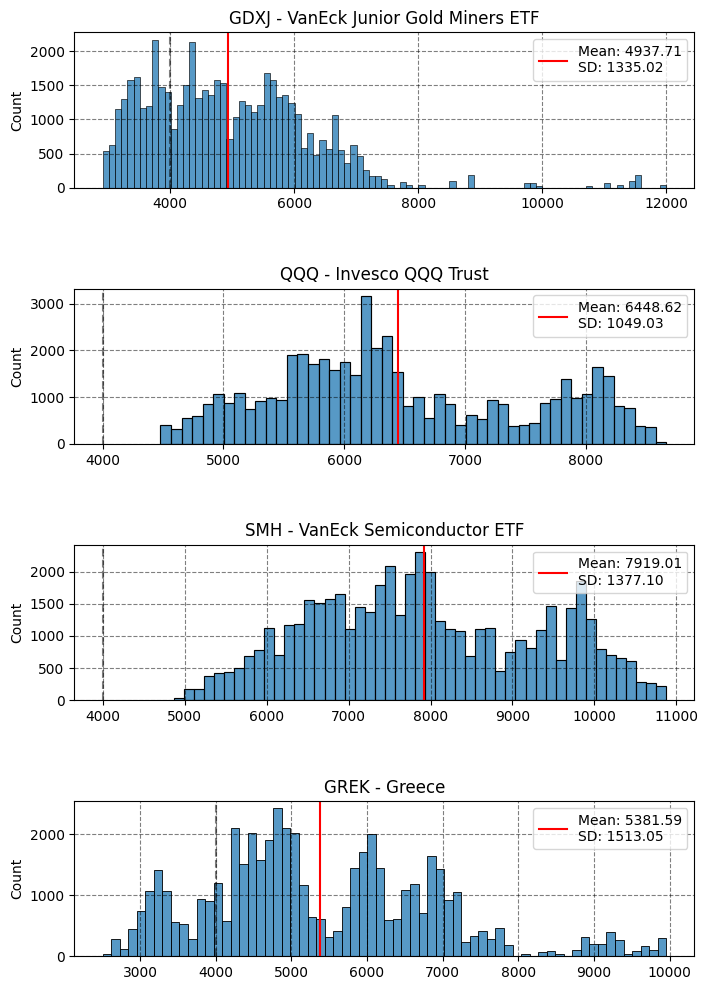

In [56]:
# Perform backtest monte carlo simulation to estimate average returns over that 10 year period for this scenario
cache = {}  # store results o

fig, ax = plt.subplots(4, 1, figsize=(8, 12))

for i, stock in enumerate(invesments):
    print(f"Simulating {stock}...")
    amts = []

    for _ in range(50_000):  # run 50000 simulations
        # pick a random start date (since rand_range_single_sim does that internally)
        # we want to key off that randomness, so we mimic it here
        start_date = pd.Timestamp(np.random.choice(date_ls))
        key = (stock, start_date)

        # check cache
        if key in cache:
            amt = cache[key]
        else:
            amt = rand_range_single_sim(date_ls, stock)
            cache[key] = amt

        amts.append(amt)

    sns.histplot(amts, ax=ax[i])
    ax[i].set_title(f"{stock} - {investment_names[i]}")
    ax[i].grid(alpha=0.5, color='k', linestyle='--')
    ax[i].axvline(x=4000, color='k', linestyle='--', alpha=0.5)
    ax[i].axvline(
        x=np.mean(amts),
        color='r',
        label=f"Mean: {np.mean(amts):.2f}\nSD: {np.std(amts):.2f}"
    )
    ax[i].legend()

plt.subplots_adjust(hspace=0.65)
plt.show()


Based off of 10 years of data, we see that to get the highest return you should invest in SMH as investing 1000 dollars a year would approximately get you $7919. However, SMH is relatively volatile, making QQQ a good choice, as you can expect good returns(10% per year), which are low risk, and can act as steady income that will compound.